In [2]:
%pylab inline
import pandas as pd
pd.options.display.max_colwidth = 80
from ipymol import viewer as pymol
pymol.start()

Populating the interactive namespace from numpy and matplotlib


In [3]:
def gen_pymol_session(pdb1, pdb2, pos1, pos2):
    pymol.reinit()
    pymol.do("fetch %s, async=0" % pdb1)
    pymol.do("color palegreen, %s" % pdb1)
    pymol.do("fetch %s, async=0" % pdb2)
    pymol.do("color lightblue, %s" % pdb2)
    pymol.do("select frag1_sele, " + pdb1 + (" and resi %s-%s" % pos1))
    pymol.do("select frag2_sele, " + pdb2 + (" and resi %s-%s" % pos2))
    pymol.do("color green, frag1_sele")
    pymol.do("color blue, frag2_sele")
    pymol.do("super frag1_sele, frag2_sele")
    pymol.do("copy_to frag1_sele, frag1")
    pymol.do("copy_to frag2_sele, frag2")
    pymol.do("bg_color white")
    pymol.do("hide everything")
    pymol.do("show cartoon")
    pymol.do("ray")
    pymol.show()

In [4]:
def filter_substring(x, y):
    if x.find(y) > 0 or y.find(x) > 0:
        return False
    else:
        return True

In [5]:
df = pd.read_csv("../data/pdb_str/chem_found_hits_sample.csv", sep=",")
df = df[df[["x_chem_seq", "y_chem_seq"]].apply(lambda x: filter_substring(x.x_chem_seq, x.y_chem_seq), axis=1)]
df.sort_values(by="hit_length", ascending=False)[["x", "y", "hit", "x_hit_start","x_hit_end","y_hit_start","y_hit_end","x_range","y_range","x_hit_range","y_hit_range"]]


,x,y,hit,x_hit_start,x_hit_end,y_hit_start,y_hit_end,x_range,y_range,x_hit_range,y_hit_range
6195,1a2pA00,3da7E00,rsaaasramhrbbaismrahbhsamaaaraahbamaasaaiabhaaasarhmbsabaiab,5,64,44,103,3-110:A,3-112:E,7:66,46:105
2580,1cf9A01,1ye9A02,aababahaabarrmirbhahsahbasrahsimbahiarabrhh,76,118,1,43,51-436:A,"126-205:A,263-294:A",126:168,126:168
5422,1at9A00,1bhaA00,isabbrraahhaaiaaarhwrahwaaaraahwai,36,69,34,67,2-231:A,2-70:A,37:70,35:68
5880,1df4A00,2cmrA00,aammmmmaabaasammbaamaharaabmama,1,31,7,37,3-64:A,1-216:A,3:33,7:37
5881,1df4A00,2kp8A00,aammmmmaabaasammbaamaharaabmama,1,31,36,66,3-64:A,1-72:A,3:33,36:66
5882,1df4A00,3vtpC00,mmmmmaabaasammbaamaharaabmama,3,31,1,29,3-64:A,550-590:C,5:33,550:578
531,1bg6A01,1ka2A00,araaabamhaaarsasam,18,35,18,35,4-195:A,3-499:A,21:38,20:37
6246,1attB02,2znhA03,sarahsarbbarasams,242,258,12,28,"14-225:B,322-378:B",350-396:A,351:367,361:377
2254,1cg2A01,4ex8A00,ashaaaiararbhsba,239,254,167,182,"26-213:A,324-414:A",5-305:A,374:389,171:186
4903,1as4A02,1hqoA02,ahaasbrhssabbara,100,115,45,60,"25-193:A,289-342:A",197-349:A,124:139,241:256


In [6]:
df.loc[[6195]][["x", "y", "hit", "x_hit_start","x_hit_end","y_hit_start","y_hit_end","x_range","y_range","x_hit_range","y_hit_range"]]

,x,y,hit,x_hit_start,x_hit_end,y_hit_start,y_hit_end,x_range,y_range,x_hit_range,y_hit_range
6195,1a2pA00,3da7E00,rsaaasramhrbbaismrahbhsamaaaraahbamaasaaiabhaaasarhmbsabaiab,5,64,44,103,3-110:A,3-112:E,7:66,46:105


In [10]:
df.loc[6195].x_pdb_seq      

'VINTFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVAPGKSIGGDIFSNREGKLPGKSGRTWREADINYTSGFRNSDRILYSSDWLIYKTTDHYQTFTKIR'

In [11]:
df.loc[6195].y_pdb_seq  

'GRTWREADINYTSGFRNSDRILYSSDWLIYKTTDHYQTFTKIRFDGVADYLQTYHKLPDNYITKSEAQALGWVASKGNLADVAPGKSIGGDIFSNREGKLPGK'

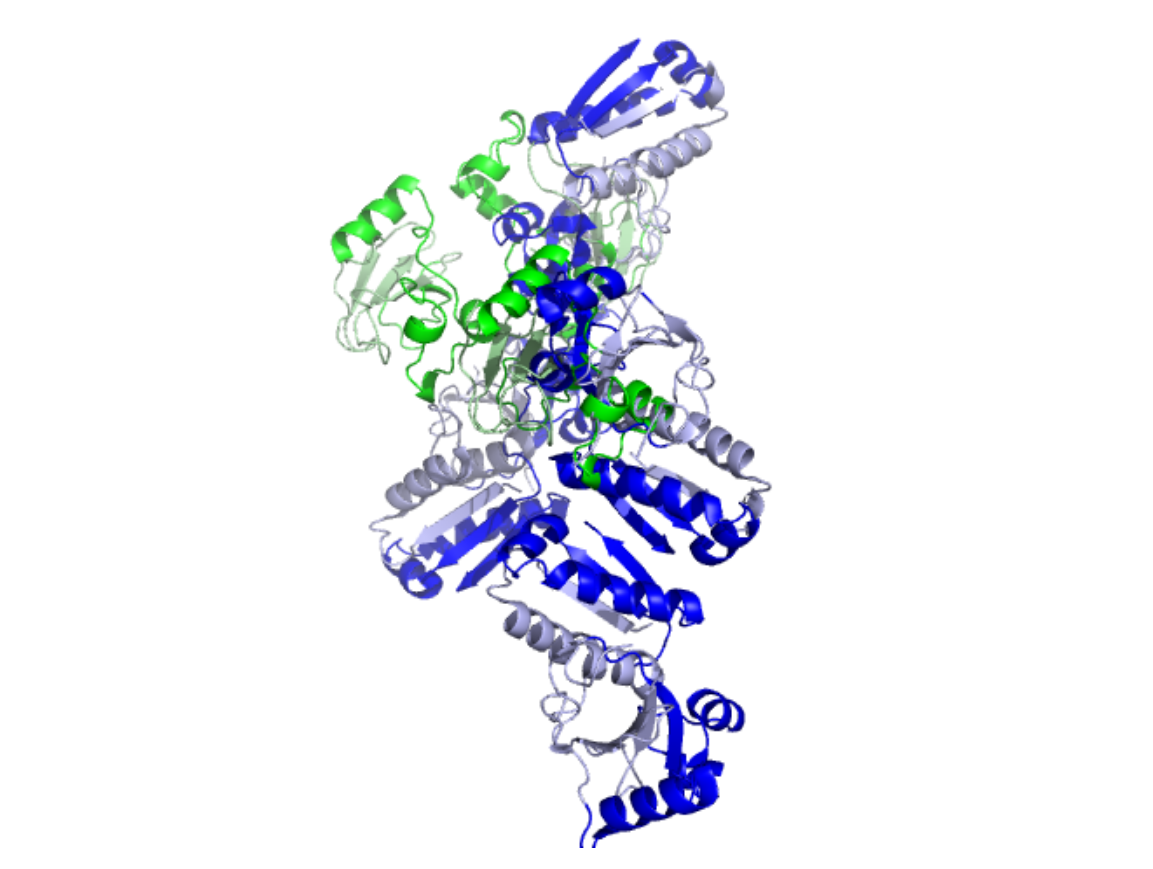

In [8]:
gen_pymol_session("1a2p", "3da7", (7,66), (46,105))

In [ ]:
df.loc[[5422]][["x", "y", "hit", "x_hit_start","x_hit_end","y_hit_start","y_hit_end","x_range","y_range","x_hit_range","y_hit_range"]]

In [ ]:
gen_pymol_session("1at9", "1bha", (37,70), (35,68))

In [ ]:
df.loc[[5880]][["x", "y", "hit", "x_hit_start","x_hit_end","y_hit_start","y_hit_end","x_range","y_range","x_hit_range","y_hit_range"]]

In [ ]:
gen_pymol_session("1df4", "2cmr", (3,33), (7,37))

In [ ]:
df.loc[[5]][["x", "y", "hit", "x_hit_start","x_hit_end","y_hit_start","y_hit_end","x_range","y_range","x_hit_range","y_hit_range"]]

In [ ]:
gen_pymol_session("1ci4", "1ehk", (19,30), (195,206))

In [ ]:
df.loc[[6310]][["x", "y", "hit", "x_hit_start","x_hit_end","y_hit_start","y_hit_end","x_range","y_range","x_hit_range","y_hit_range"]]

In [ ]:
gen_pymol_session("1bkb", "2q2b", (82,92), (221,231))

In [ ]:
df.loc[[4511]][["x", "y", "hit", "x_hit_start","x_hit_end","y_hit_start","y_hit_end","x_range","y_range","x_hit_range","y_hit_range"]]


In [ ]:
gen_pymol_session("1ddq", "1hi9", (576,590), (146,160))

In [ ]:
df.loc[[1364]][["x", "y", "hit", "x_hit_start","x_hit_end","y_hit_start","y_hit_end","x_range","y_range","x_hit_range","y_hit_range"]]

In [ ]:
gen_pymol_session("1chu", "2l35", (10,24), (37,51))

In [ ]:
df.loc[[523]][["x", "y", "hit", "x_hit_start","x_hit_end","y_hit_start","y_hit_end","x_range","y_range","x_hit_range","y_hit_range"]]

In [ ]:
gen_pymol_session("1bg5", "2zxe", (237,251), (157,171))

In [ ]:
df.loc[[2519]][["x", "y", "hit", "x_hit_start","x_hit_end","y_hit_start","y_hit_end","x_range","y_range","x_hit_range","y_hit_range"]]

In [ ]:
gen_pymol_session("1ci9", "5kjp", (184,198), (187,201))

In [ ]:
df.loc[[2429]][["x", "y", "hit", "x_hit_start","x_hit_end","y_hit_start","y_hit_end","x_range","y_range","x_hit_range","y_hit_range"]]

In [ ]:
gen_pymol_session("1ddq", "3goh", (848,858), (64,74))

In [ ]:
df.loc[[375]][["x", "y", "hit", "x_hit_start","x_hit_end","y_hit_start","y_hit_end","x_range","y_range","x_hit_range","y_hit_range"]]

In [ ]:
gen_pymol_session("1aor", "3opy", (102,116), (138,152))

In [ ]:
df.loc[[3239]][["x", "y", "hit", "x_hit_start","x_hit_end","y_hit_start","y_hit_end","x_range","y_range","x_hit_range","y_hit_range"]]


In [ ]:
gen_pymol_session("1e8c", "5t5q", (137,151), (9,23))

In [ ]:
df.loc[[300]][["x", "y", "hit", "x_hit_start","x_hit_end","y_hit_start","y_hit_end","x_range","y_range","x_hit_range","y_hit_range"]]

In [ ]:
gen_pymol_session("1at9", "5g0x", (92,106), (120,134))

In [ ]:
df.loc[[4880]][["x", "y", "hit", "x_hit_start","x_hit_end","y_hit_start","y_hit_end","x_range","y_range","x_hit_range","y_hit_range"]]

In [ ]:
gen_pymol_session("1aro", "2zsg", (676,690), (287,301) )